<a href="https://colab.research.google.com/github/Laraguy/Mareas/blob/main/TP4_MAREAS_LARA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

## Análisis Armónico

Si consideramos que el nivel del mar observado puede ser expresado como:

$$h(t)=S_0+\sum_{i=1}^{Q} R_i \cos(\sigma_it-\alpha_i)$$

Con $S_0$ es el nivel medio del mar (considerado constante).
$R_i$, $\sigma_i$ y $\alpha_i$ son la amplitud, a frecuencia angular (de la TdE) y la fase de cada armónico.



In [ ]:
#@title Carga del archivo { form-width: "10%" }
!wget https://raw.githubusercontent.com/lupalon/Mareas2022/main/5_MdP.xlsx
mdp=pd.read_excel(r'5_MdP.xlsx')
#HKmh.rename(columns={HKmh.columns[0]:'nom',HKmh.columns[1]:'H',HKmh.columns[2]:'sigma',HKmh.columns[3]:'K'},inplace=True)

--2022-11-06 19:11:53--  https://raw.githubusercontent.com/lupalon/Mareas2022/main/5_MdP.xlsx
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 34978 (34K) [application/octet-stream]
Saving to: ‘5_MdP.xlsx’

5_MdP.xlsx          100%[===================>]  34.16K  --.-KB/s    in 0.001s  

2022-11-06 19:11:53 (36.1 MB/s) - ‘5_MdP.xlsx’ saved [34978/34978]



In [ ]:
mdp.describe()

,OBS
count,1104.000000
mean,124.326993
std,45.146753
min,11.000000
25%,93.750000
50%,123.000000
75%,154.000000
max,285.000000


In [ ]:
mdp.FECHA.iloc[-1]

Timestamp('1986-05-16 23:00:00')

In [ ]:
mdp

,FECHA,OBS
0,1986-04-01 00:00:00,186
1,1986-04-01 01:00:00,171
2,1986-04-01 02:00:00,146
3,1986-04-01 03:00:00,115
4,1986-04-01 04:00:00,90
...,...,...
1099,1986-05-16 19:00:00,59
1100,1986-05-16 20:00:00,78
1101,1986-05-16 21:00:00,94
1102,1986-05-16 22:00:00,115


Tengo datos cada una hora desde el 1ro de abril del 86 hasta el 16 de mayo del 86 



Las frecuencias angulares (sigmas) de la TDE en orden m2,s2, n2, k2, k1, o1, p1

In [ ]:
sigmas= ([28.984104, 30.000000, 28.439729, 15.041069, 13.943036])

In [ ]:
serie=pd.read_excel(r'5_MdP.xlsx',index_col=0)
dt= 1
serie

,OBS
FECHA,
1986-04-01 00:00:00,186
1986-04-01 01:00:00,171
1986-04-01 02:00:00,146
1986-04-01 03:00:00,115
1986-04-01 04:00:00,90
...,...
1986-05-16 19:00:00,59
1986-05-16 20:00:00,78
1986-05-16 21:00:00,94


In [ ]:
series=mdp.OBS.values-mdp.OBS.mean()

In [ ]:
series

array([ 61.67300725,  46.67300725,  21.67300725, ..., -30.32699275,
        -9.32699275,   1.67300725])

In [ ]:
#Series supongo que es un array,idem sigmas, dt el delta temporal en horas
def AnAr(series,sigmas,dt):
  Q=len(sigmas)
  T=len(series)
  s=series#[0:(T-1+T%2)] #En caso de que sea par, tiramos el último
  T=len(s)
  #t=np.linspace(-(T//2),T//2,len(s))
  t=np.linspace(0,len(s)*dt,len(s))
  eleA=[]
  eleB=[]
  for i in range(Q):
    eleA.append(np.cos(np.radians(sigmas[i]*t)))
    eleB.append(np.sin(np.radians(sigmas[i]*t)))
  eleA=np.array(eleA)
  eleB=np.array(eleB)
  ELE=np.concatenate((eleA.T,eleB.T),axis=1)
  vemosELE=np.linalg.lstsq(ELE,s,rcond=None)
  R=np.around(np.sqrt(vemosELE[0][0:Q]**2+vemosELE[0][Q::]**2),4)
  a=np.around(np.arctan2(vemosELE[0][Q::],vemosELE[0][0:Q]),4)
  a=a*180/np.pi
  a[a<0]=a[a<0]+360
  a=np.around(a,4)
  return(R,a)


In [ ]:
R,a=AnAr(series,sigmas,dt)
R,a

(array([34.3833,  8.2292,  9.3654, 15.3923, 21.6777]),
 array([ 25.1643, 296.2584,  19.3946,  16.0715, 292.6832]))

In [ ]:
def pred(R,a,t,sigma):
    Q=len(R)
    ondas=pd.DataFrame()
    for i in range(Q):
        ondas.insert(i,i,(R[i])*np.cos(np.deg2rad(sigma[i]*t-a[i])))
    suma=ondas.sum(axis=1).values
    prediccion=pd.DataFrame(np.around(suma,4))
    return prediccion

In [ ]:
t=np.linspace(0,len(series)*dt,len(series))

In [ ]:
predi=pred(R,a,t,sigmas)

In [ ]:
predi

,0
0,191.0871
1,186.0339
2,169.0305
3,143.3041
4,114.0682
...,...
1099,118.4886
1100,134.3688
1101,152.3675
1102,168.8925


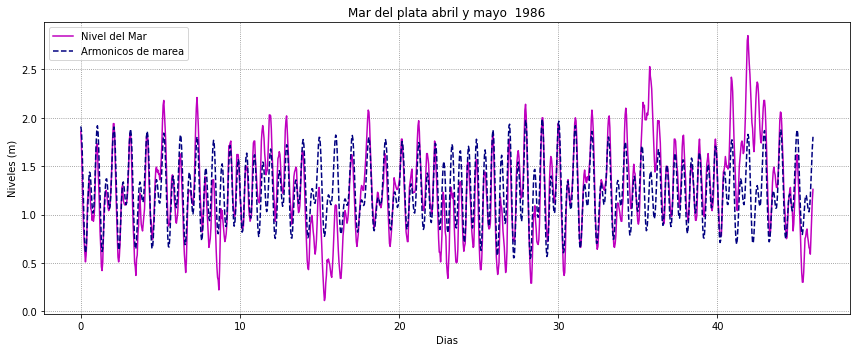

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(t/24,serie/100,'m')
ax.plot(t/24,predi.values/100,"--", color="navy")
ax.set(ylabel="Niveles (m)",xlabel= "Dias", title='Mar del plata abril y mayo  1986')
#ax.xaxis.set_minor_locator(mdates.HourLocator())
#ax.xaxis.set_major_locator(mdates.DayLocator())
#ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.grid(color='grey',linestyle=':')
ax.legend(['Nivel del Mar','Armonicos de marea'])
plt.tight_layout()

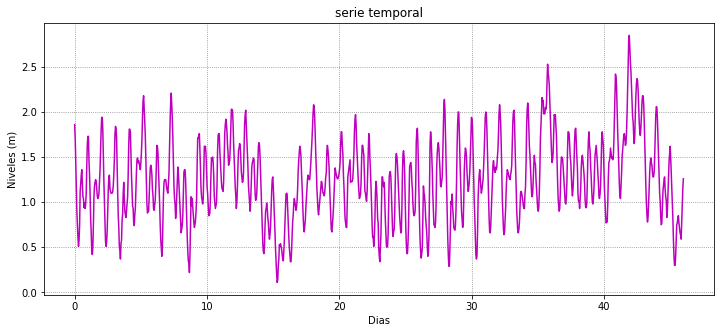

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(t/24,series/100, color="m")
ax.set(ylabel="Niveles (m)",xlabel= "Dias",title='serie temporal')
ax.grid(color='grey',linestyle=':')

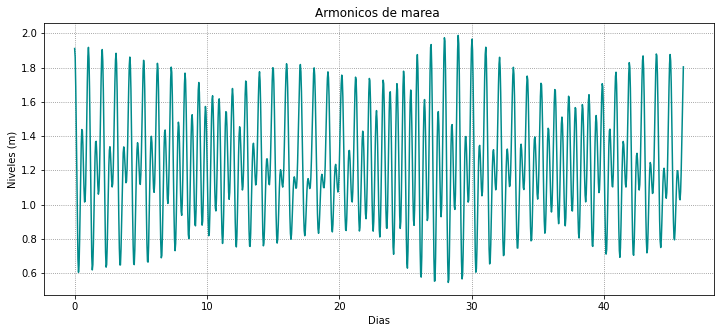

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(t/24,predi.values/100, color="darkcyan")
ax.set(ylabel="Niveles (m)",xlabel= "Dias",title='Armonicos de marea ')
ax.grid(color='grey',linestyle=':')

In [ ]:
predi.values

array([[191.0871],
       [186.0339],
       [169.0305],
       ...,
       [152.3675],
       [168.8925],
       [180.3807]])

In [ ]:
series

array([186, 171, 146, ...,  94, 115, 126])

In [ ]:
series.size 


1104

In [ ]:
predi.size

1104

In [ ]:
resta= serie - predi.values

In [ ]:
resta.size

1104

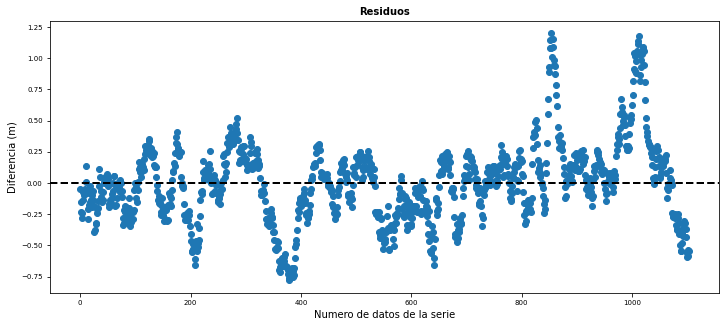

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,5))
ax.scatter(list(range(len(serie))), resta/100)
ax.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
ax.set_title('Residuos', fontsize = 10, fontweight = "bold")
ax.set_xlabel('Numero de datos de la serie')
ax.set_ylabel('Diferencia (m)')
ax.tick_params(labelsize = 7)


Tengo datos cada una hora desde el 1ro de abril del 86 hasta el 16 de mayo del 86

Las frecuencias angulares (sigmas_1) de la TDE en orden M2,S2, n2, k1, o1  y M4 con 5 componentes me quedo segun el criterio de rayleigh

In [ ]:
sigmas_1= ([0, 28.984104, 30.000000, 28.439729, 15.041069, 13.943036, 57.9682075	])

In [ ]:
#Series supongo que es un array,idem sigmas, dt el delta temporal en horas
def AnAr(series,sigmas_1,dt):
  Q=len(sigmas_1)
  T=len(series)
  s=series#[0:(T-1+T%2)] #En caso de que sea par, tiramos el último
  T=len(s)
  #t=np.linspace(-(T//2),T//2,len(s))
  t=np.linspace(0,len(s)*dt,len(s))
  eleA=[]
  eleB=[]
  for i in range(Q):
    eleA.append(np.cos(np.radians(sigmas_1[i]*t)))
    eleB.append(np.sin(np.radians(sigmas_1[i]*t)))
  eleA=np.array(eleA)
  eleB=np.array(eleB)
  ELE=np.concatenate((eleA.T,eleB.T),axis=1)
  vemosELE=np.linalg.lstsq(ELE,s,rcond=None)
  R_1=np.around(np.sqrt(vemosELE[0][0:Q]**2+vemosELE[0][Q::]**2),4)
  a_1=np.around(np.arctan2(vemosELE[0][Q::],vemosELE[0][0:Q]),4)
  a_1=a_1*180/np.pi
  a_1[a_1<0]=a_1[a_1<0]+360
  a_1=np.around(a_1,4)
  return(R_1,a_1)

In [ ]:
R_1,a_1=AnAr(series,sigmas_1,dt)
R_1,a_1

(array([124.343 ,  34.3865,   8.2286,   9.3702,  15.3952,  21.6795,
          3.3385]),
 array([  0.    ,  25.1643, 296.2986,  19.4462,  16.0829, 292.6775,
        347.4751]))

In [ ]:
def pred(R_1,a_1,t,sigma_1):
    Q=len(R_1)
    ondas=pd.DataFrame()
    for i in range(Q):
        ondas.insert(i,i,(R_1[i])*np.cos(np.deg2rad(sigma_1[i]*t-a_1[i])))
    suma=ondas.sum(axis=1).values
    prediccion=pd.DataFrame(np.around(suma,4))
    return prediccion

In [ ]:
t=np.linspace(0,len(serie)*dt,len(serie))

In [ ]:
predi_1=pred(R_1,a_1,t,sigmas_1)

In [ ]:
predi_1

,0
0,194.3574
1,187.1633
2,166.9692
3,140.0055
4,112.6485
...,...
1099,120.2814
1100,132.9387
1101,149.0611
1102,166.8286


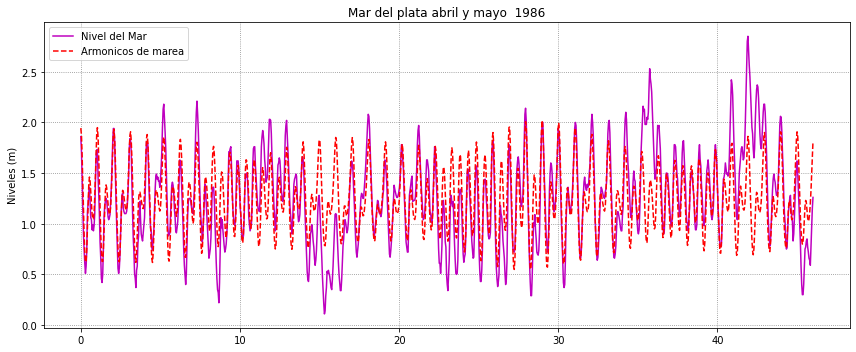

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(t/24,series/100,'m')
ax.plot(t/24,predi_1.values/100,"--", color="r")
ax.set(ylabel="Niveles (m)",title='Mar del plata abril y mayo  1986')
ax.grid(color='grey',linestyle=':')
ax.legend(['Nivel del Mar','Armonicos de marea'])
plt.tight_layout()

NameError: ignored

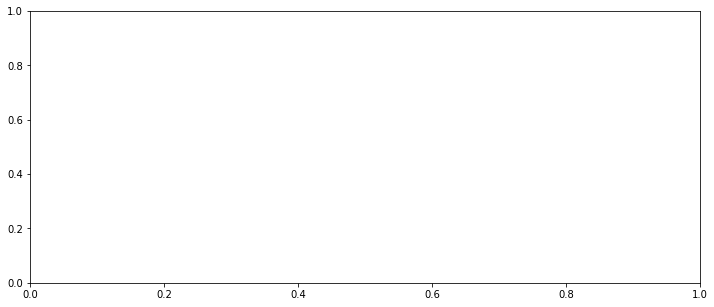

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,5))
ax.scatter(list(range(len(serie))), resta_1/100)
ax.axhline(y = 0, linestyle = '--', color = 'black', lw=2)
ax.set_title('Residuos', fontsize = 10, fontweight = "bold")
ax.set_xlabel('Numero de datos de la serie')
ax.set_ylabel('Diferencia (m)')
ax.tick_params(labelsize = 7)

In [ ]:
fig, ax=plt.subplots(1,1,figsize=(12,5))
ax.plot(t/24,series/100,'m')
ax.plot(t/24,predi.values/100,"--", color="navy")
ax.set(ylabel="Niveles (m)",title='Mar del plata abril y mayo  1986')
ax.grid(color='grey',linestyle=':')
ax.xaxis.set_minor_locator(mdates.DayLocator())
ax.xaxis.set_major_locator(mdates.DayLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%d'))
ax.legend(['Nivel del Mar','Armonicos de marea'])
plt.tight_layout()